<a href="https://colab.research.google.com/github/sumu97/Data-Science-Cheat-Code/blob/main/GameMarket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 게임 시장 분석 프로젝트

## 목적 : 다음 분기에 어떤 게임을 설계해야 하는지에 대한 Insight 도출

  - Data Description
    - Name : 게임 이름
    - Platform : 게임이 서비스되는 플랫폼의 이름
    - Year : 게임이 출시된 연도
    - Genre : 게임의 장르
    - Publisher : 게임을 제작한 회사
    - NA : 북미 출고량
    - EU : 유럽 출고량
    - JP : 일본 출고량
    - OT : 기타 출고량

  - 반드시 포함되어야 하는 내용
    1. 지역에 따라 선호하는 게임 장르가 다를까?
      - 지역 별 클러스터링
    2. 연도별 게임의 트렌드가 있을까?
      - 연도 별 클러스터링
    3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
      - 출고량 별 클러스터링 (4p)

  - 분석 진행 순서
    1. EDA 데이터 전처리 과정 / 완료
      - K 나 M 으로 표시, 분명 수치형 데이터인데 object로 남아있는 feature 들 수정
    2. 지역 - 장르 연관성 분석 및 시각화
    3. 연도별, 장르 별 출고량 시각화
    4. 출고량 계층별 분석 및 개별분석
    5. 결론

  - 참고
    - Sales Feature 의 1 단위는 백만임. 산안드레스 판매량 20.81, 실제 판매량 2750만

In [45]:
import pandas as pd

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv' # URL로 데이터셋 불러오기
df = pd.read_csv(url)
df = df.drop(df.columns[0],axis = 1) # 불러온 데이터의 인덱스 열 중복되어 삭제
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [46]:
print('[불러온 데이터의 크기]\n',df.shape)
print('[불러온 데이터의 열 별 결측치]\n',df.isnull().sum()) # Year 과 장르, 퍼블리셔에 결측치 다수
print('[불러온 데이터의 열 별 타입]\n',df.dtypes) # Sales 4개 Feature는 전부 수치화 해야 함

[불러온 데이터의 크기]
 (16598, 9)
[불러온 데이터의 열 별 결측치]
 Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
[불러온 데이터의 열 별 타입]
 Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


In [47]:
# 1. Income 데이터 수치화 (object -> int / float)
def floater(col):
  temp_list = []  # 빈 리스트 준비

  for i in col:
    try: # 바로 실수화 가능한 애들 실수화
      temp = float(i)
      temp_list.append(temp) # 실수화 된 넘 리스트에 추가
      #print(temp,'실수처리')
    except: # 바로 실수화가 안된다면? k 든 m 이든 붙어있을 것
      temp = i.replace("K", "000")
      temp = temp.replace("M", "")
      temp = float(temp) # K, M  수치화하여 실수화
      temp_list.append(temp)
      #print(temp,'수식처리')
  return temp_list 

df['NA_Sales'] = floater(df['NA_Sales'])
df['EU_Sales'] = floater(df['EU_Sales'])
df['JP_Sales'] = floater(df['JP_Sales'])
df['Other_Sales'] = floater(df['Other_Sales'])
# EDA 작업 끗!

In [48]:
# 지역 별 선호하는 게임장르를 수치화해서 함 보자
# 선호하는 게임 장르 란? 장르 별 판매량 합산 ->
NA_G = pd.concat([df.Genre,df.NA_Sales], axis = 1)
NA_G

,Genre,NA_Sales
0,Action,0.04
1,Action,0.17
2,Adventure,0.00
3,Misc,0.04
4,Platform,0.12
...,...,...
16593,Platform,0.15
16594,Action,0.01
16595,Sports,0.44
16596,Action,0.05


In [52]:
NA_G = df.NA_Sales.groupby(df.Genre).sum()
NA_G.head()

Genre
Action       7030867.78
Adventure     270105.39
Fighting      810222.39
Misc         3760404.29
Platform     3310443.13
Name: NA_Sales, dtype: float64

In [ ]:
NA_G = NA_G.to_frame(name='Value')

In [74]:
NA_G = NA_G.sort_values(by=['Value'],axis = 0, ascending=False)

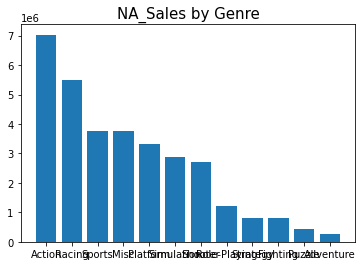

In [75]:
# Basic Bar Chart
import matplotlib.pyplot as plt

plt.bar(NA_G.index,NA_G.Value)

plt.title('NA_Sales by Genre', fontsize=15)

plt.show()

In [41]:
import pandas as pd

df = pd.DataFrame(
    {
        'Date': 
             ['08/09/2018', 
              '10/09/2018', 
              '08/09/2018', 
              '10/09/2018'],
        'Fruit': 
             ['Apple', 
              'Apple', 
              'Banana', 
              'Banana'],
        'Sale':
             [34,
              12,
              22,
              27]
    })

In [42]:
print(df.groupby(by=['Fruit','Date']).sum().groupby(level=[0]).cumsum())

                   Sale
Fruit  Date            
Apple  08/09/2018    34
       10/09/2018    46
Banana 08/09/2018    22
       10/09/2018    49
